# Perdas de Comutação e Condução
## Disciplina de Modulação - Profº Humberto Pinheiro - 2019/2
**Autor:** Tiarles da Rocha Moralles Guterres (Engenheiro de Computação (UFSM))

* **Componente:** SiC MOSFET Module SKM350MB120SCH17
    * 1200 V
    * 523 A

In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
from halfBridgeModule import getPolyFromPoints

### 1. Listas com os valores obtidos pelo LTSpice de energia

In [11]:
currentValues_On = [175.87, 237.2, 316.18, 459.98, 530.02, 595.26, 697.38]
energyOn   = [3.745, 5.4102, 7.5452, 12.002, 14.206, 14.206, 20.169]

currentValues_Off = [177.41, 310.17, 459.53, 566.94, 700.6]
energyOff  = [2.7786, 6.4167, 11.869, 15.927, 21.513]

currentValues_Rec = [177.41, 305.65, 439.61, 562.11, 699.7]
energyRec  = [0.49653, 1.0981,  2.4063,  3.3898, 3.8481]

energyOn  = np.array(energyOn)  / 1e3
energyOff = np.array(energyOff) / 1e3
energyRec = np.array(energyRec) / 1e3

### 2. Obtenção dos parâmetros e dos polinômios

In [12]:
p_energyOn   = getPolyFromPoints(currentValues_On, energyOn, 3)
p_energyOff  = getPolyFromPoints(currentValues_Off, energyOff, 3)
p_energyRec  = getPolyFromPoints(currentValues_Rec, energyRec, 3)
p_energyD_On = None

### 3. Plot dos polinômios gerados

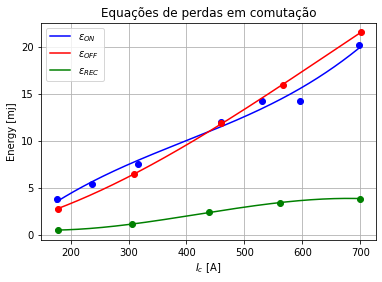

In [18]:
current = np.linspace(175, 700, 700*2)

plt.plot(current, p_energyOn(current)*1e3, 'b-', label='$\epsilon_{ON}$')
plt.plot(currentValues_On, energyOn*1e3, 'bo ')
plt.plot(current, p_energyOff(current)*1e3, 'r-', label='$\epsilon_{OFF}$')
plt.plot(currentValues_Off, energyOff*1e3, 'ro ')
plt.plot(current, p_energyRec(current)*1e3, 'g-', label='$\epsilon_{REC}$')
plt.plot(currentValues_Rec, energyRec*1e3, 'go ')
# plt.plot(current, p_energyD_On(current), 'y-', label='$\epsilon_{D, ON}$')
# plt.plot(currentValues, energyD_On, 'yo ')
plt.legend()
plt.title('Equações de perdas em comutação')
plt.xlabel('$I_c$ [A]')
plt.ylabel('Energy [mj]')
plt.grid()
plt.show()

![](Sic_polys.jpg)

### 4. Salvando equações num ``pickle`` para uso em outro script

In [20]:
import pickle

to_save = {'name': 'SKM350MB120SCH17', 'type': 'SiC', 'eon': p_energyOn, 'eoff': p_energyOff, 'erec': p_energyRec, 'eDon': p_energyD_On}

with open('models/SKM350MB120SCH17.pklmod', 'wb') as filep:
    pickle.dump(to_save, filep)